In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import TP_dect, real_time_sig_process, cut_sig, trig_point_detect

pred_path = './Dataset/prediction/'
rawdata_path = './Dataset/train_set.csv'
pred_list  = os.listdir(pred_path)
input_win = 50
output_win = 15
filter_win = 9
half_filter_win = int((filter_win - 1) / 2)
latency,num_slope,num_label = 6,5,output_win
num_input = input_win
least_sig_len = 105

df = pd.read_csv(rawdata_path, header=None).to_numpy()
processed_origin = [real_time_sig_process(line)[half_filter_win:-half_filter_win] for line in df]
origin = processed_origin[0]
Y_arr = [origin[i_input + num_input : i_input  + num_input + num_label] for i_input in range(len(origin)-num_input-num_label+1)]
TP_det_index_list, _ = trig_point_detect(Y_arr)

trash_points = np.array(TP_det_index_list[1:])[np.diff(TP_det_index_list)>50]
cut_points = []
for i in trash_points:
    trash_point_idx = TP_det_index_list.index(i)
    cut_points.append((TP_det_index_list[trash_point_idx-1], TP_det_index_list[trash_point_idx]))

best_sig = cut_sig(cut_points, origin)

In [22]:
length = [len(sig) for sig in best_sig]
length

[1167, 9, 426, 829, 1501, 488]

In [19]:
cut_points

[(1167, 1251), (1260, 1440), (1866, 1930), (2759, 2943), (4444, 4504)]

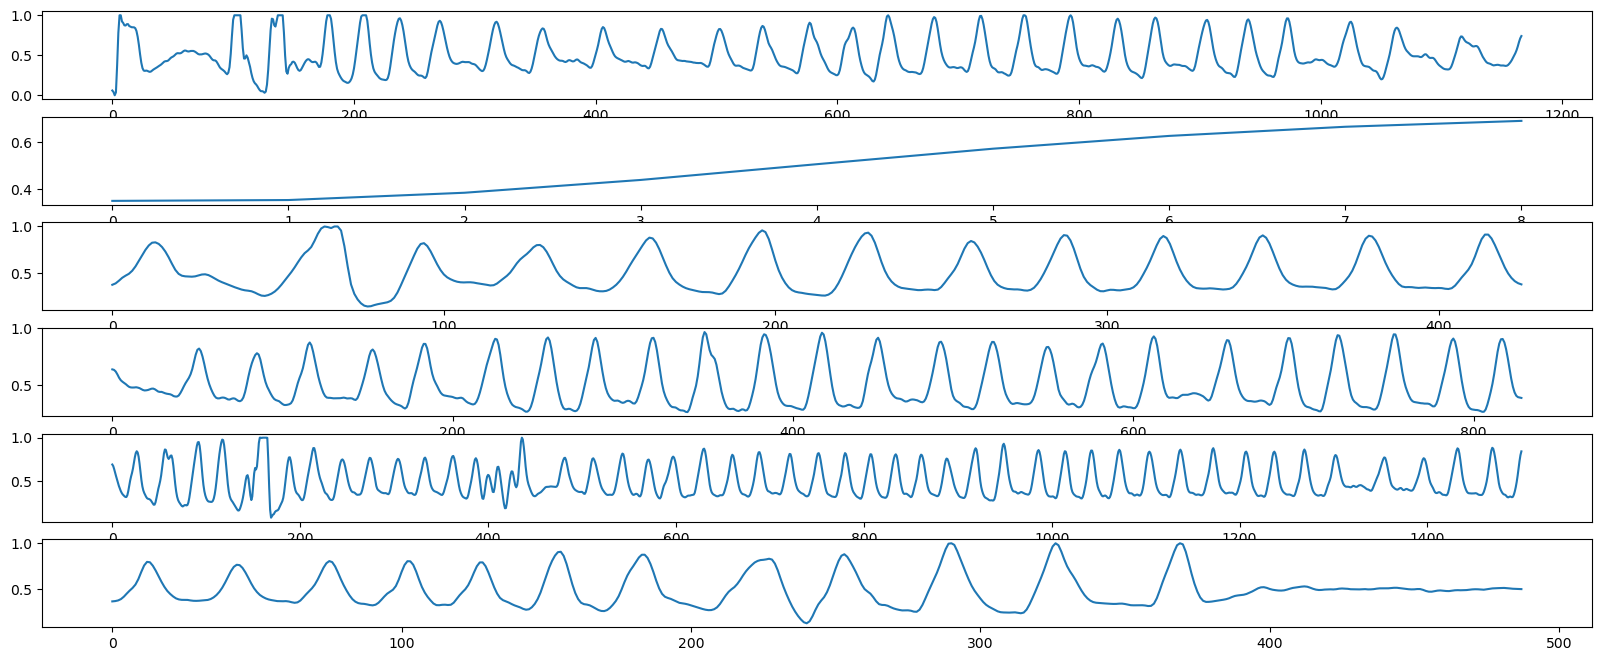

In [20]:
fig, ax = plt.subplots(len(best_sig), 1, figsize=(20, 8))
for i, sig in enumerate(best_sig):
    x = np.arange(len(sig))
    ax[i].plot(x, sig)

plt.show()